In [1]:
from functools import partial

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from bounded_rand_walkers.functions import (
    Exponential,
    Freehand,
    Gaussian,
    Power,
    Tophat_1D,
    Tophat_2D,
)
from bounded_rand_walkers.utils import get_centres

mpl.rc_file("matplotlibrc")

### 1D case

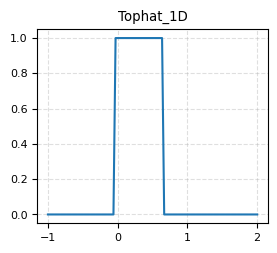

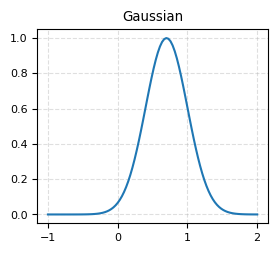

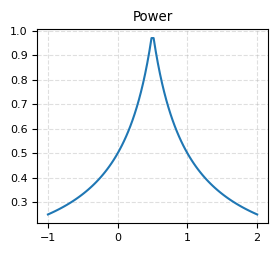

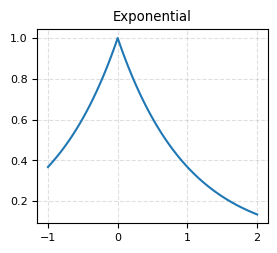

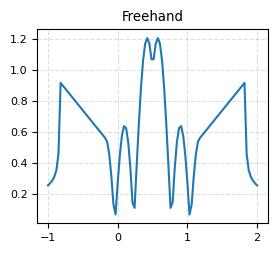

In [2]:
pdfs_args_1D = [
    (Tophat_1D, {"width": 0.7, "centre": 0.3}),
    (Gaussian, {"centre": np.array([0.7]), "width": 0.3}),
    (Power, {"centre": np.array([0.5]), "exponent": 1.0, "binsize": 0.5}),
    (Exponential, {"centre": np.array([0.0]), "decay_rate": 1.0}),
    (Freehand, {"centre": np.array([0.5, 0.5]), "width": 2.0}),
]

x = np.linspace(-1, 2, 100)
for PDFClass, kwargs in pdfs_args_1D:
    instance = PDFClass(**kwargs)

    plt.figure()
    plt.title(PDFClass.__name__)
    plt.plot(x, [instance(np.array([v])) for v in x])

### 2D case

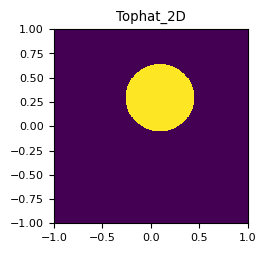

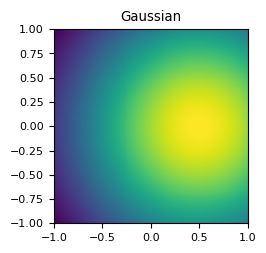

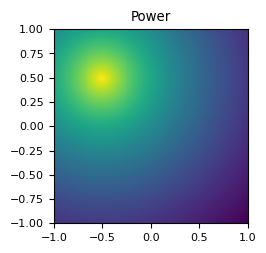

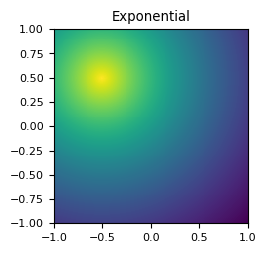

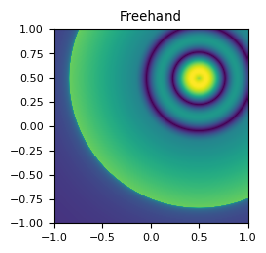

In [3]:
pdfs_args_2D = [
    (Tophat_2D, {"extent": 0.7, "x_centre": 0.3, "y_centre": 0.1, "type_2D": 0}),
    (Gaussian, {"centre": np.array((0.0, 0.5)), "width": 1.0}),
    (
        Power,
        {
            "centre": np.array((0.5, -0.5)),
            "exponent": 0.2,
            "binsize": 0.8,
        },
    ),
    (
        Exponential,
        {
            "centre": np.array([0.5, -0.5]),
            "decay_rate": 0.5,
        },
    ),
    (Freehand, {"centre": np.array([0.5, 0.5]), "width": 2.0}),
]

x_edges = y_edges = np.linspace(-1, 1, 200)
x_centres = y_centres = get_centres(x_edges)

for PDFClass, kwargs in pdfs_args_2D:
    C = np.empty((x_centres.shape[0], y_centres.shape[0]))
    instance = PDFClass(**kwargs)
    for i, x in enumerate(x_centres):
        for j, y in enumerate(y_centres):
            C[i, j] = instance(np.array([x, y]))

    fig, ax = plt.subplots()
    ax.set_title(PDFClass.__name__)
    ax.pcolormesh(x_edges, y_edges, C)
    ax.set_aspect("equal")